In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('manhattan.csv')
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


## Analyzing Rent Price in Manhattan

In [3]:
df.dtypes

rental_id             int64
rent                  int64
bedrooms            float64
bathrooms             int64
size_sqft             int64
min_to_subway         int64
floor               float64
building_age_yrs      int64
no_fee                int64
has_roofdeck          int64
has_washer_dryer      int64
has_doorman           int64
has_elevator          int64
has_dishwasher        int64
has_patio             int64
has_gym               int64
neighborhood         object
borough              object
dtype: object

In [4]:
rent_price = df['rent']
len(rent_price)

3539

In [5]:
print(f'Average price of rent : ${rent_price.mean()}')
print(f'Median price of rent : ${rent_price.median()}')
print(f'Maximum rental price : ${rent_price.max()}')
print(f'Minimum rental price : ${rent_price.min()}')

Average price of rent : $5138.9403786380335
Median price of rent : $4000.0
Maximum rental price : $20000
Minimum rental price : $1300


Text(0.5, 1.0, 'Distribution of Rental Price in Manhattan')

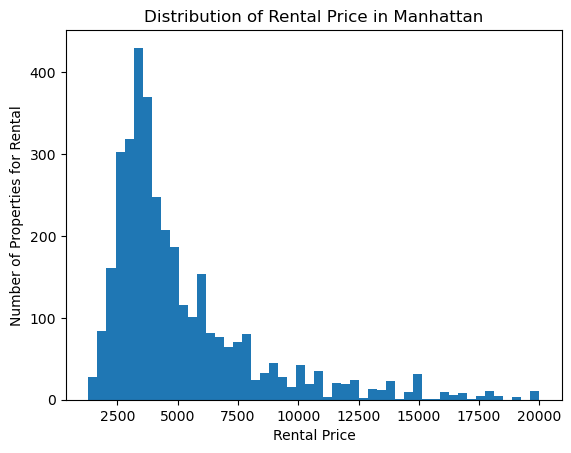

In [6]:
plt.hist(rent_price,bins=50)
plt.xlabel('Rental Price')
plt.ylabel('Number of Properties for Rental')
plt.title('Distribution of Rental Price in Manhattan')

### What proportion of NYC rentals have gym?

In [7]:
has_gym = df[df.has_gym==1]
has_gym[['rent','has_gym']]
has_gym_count = len(has_gym)
print(f'Number of Rents with gym : {has_gym_count}')
print(f'Proportion of NYC rentals with gym : {has_gym_count / len(df)}')

Number of Rents with gym : 619
Proportion of NYC rentals with gym : 0.17490816614862956


# Box plot for rent variable

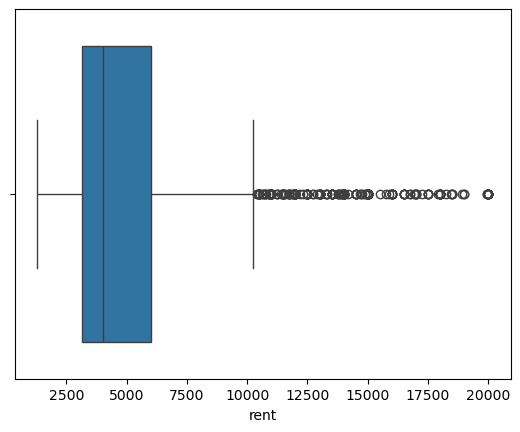

In [8]:
sns.boxplot(x='rent', data = df)
plt.show()

## Comparing histograms of rent variable by number of bins

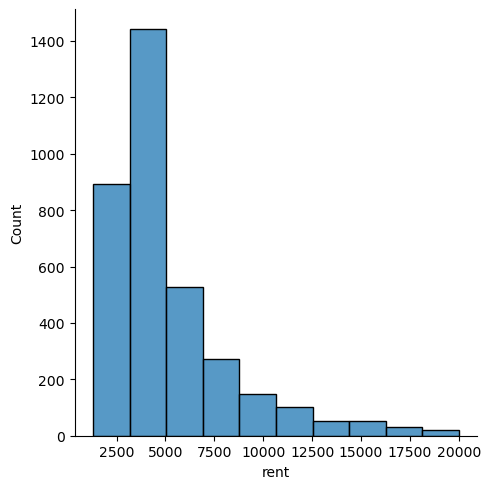

In [9]:
sns.displot(df.rent, bins=10, kde=False)
plt.show()

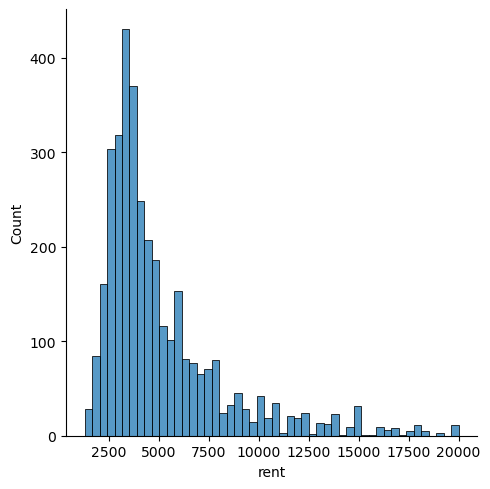

In [10]:
sns.displot(df.rent, bins=50, kde=False)
plt.show()

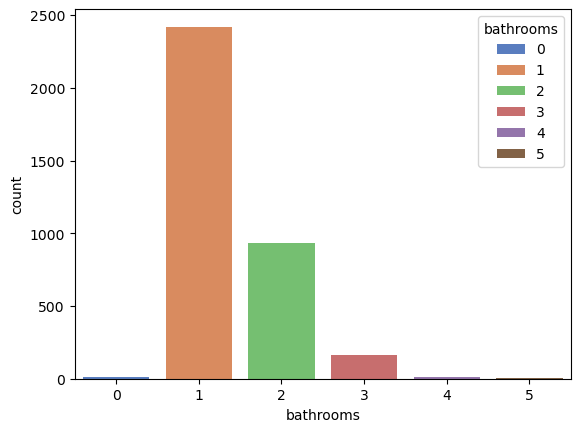

In [11]:
# Count of rentals with the number of bathrooms
num_of_bathrooms = set(df.bathrooms)
sns.countplot(x='bathrooms', data = df, palette = 'muted', hue=df['bathrooms'])
plt.show()

## Analyzing the relationship between number of bedrooms and rental price

In [12]:
number_of_bedrooms = set(df['bedrooms'])
number_of_bedrooms

{0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0}

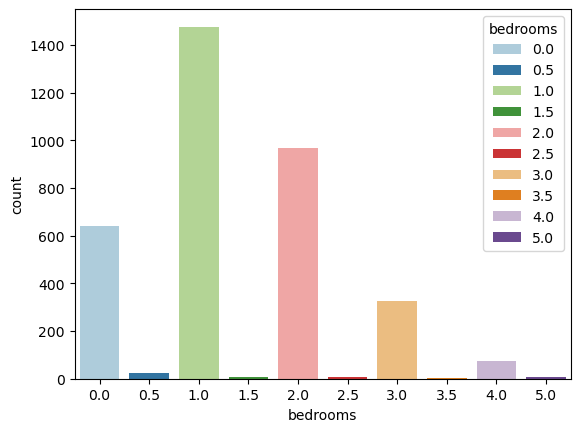

In [13]:
sns.countplot(x='bedrooms', data = df, palette = 'Paired', hue = df['bedrooms'])
plt.show()

In [14]:
'''
Since those rental places with integer number of bedrooms are taking most amount of whole data,
we are going to analyze the relationship between the number of bedrooms (0,1,2,3,4 bedrooms) and rental price
'''
bedroom_num_integer = df[df.bedrooms % 1.0 == 0]
print(f'number of rental places with integer number of bedrooms : {len(bedroom_num_integer)}')
print(f'number of rental places with non-integer number of bedrooms (example : 0.5, 1.5) : {len(df[df.bedrooms % 1.0 != 0])}')

number of rental places with integer number of bedrooms : 3496
number of rental places with non-integer number of bedrooms (example : 0.5, 1.5) : 43


/var/folders/lt/7_t8f37x0_1fmgc8jk4jh5qr0000gn/T/ipykernel_26505/3825568575.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bedrooms', data = bedroom_num_integer, palette = 'Set2')


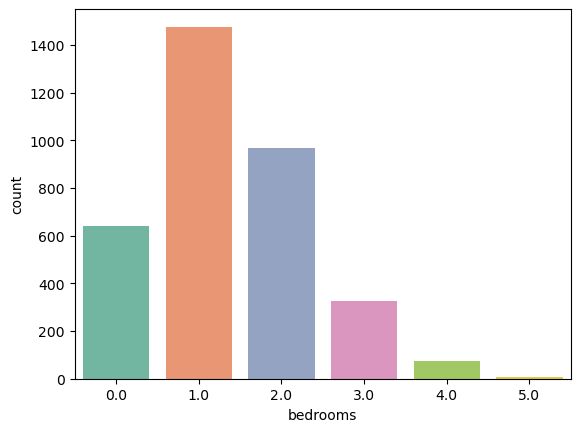

In [15]:
sns.countplot(x='bedrooms', data = bedroom_num_integer, palette = 'Set2')
plt.show()

/var/folders/lt/7_t8f37x0_1fmgc8jk4jh5qr0000gn/T/ipykernel_26505/326641927.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bedrooms', y='rent', data=bedroom_num_integer, palette='Accent')


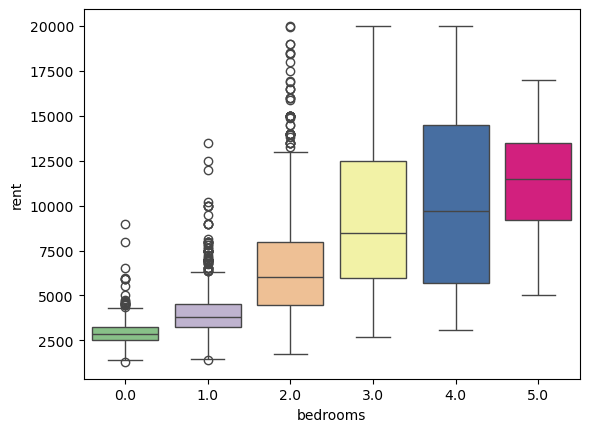

In [16]:
sns.boxplot(x='bedrooms', y='rent', data=bedroom_num_integer, palette='Accent')
plt.show()

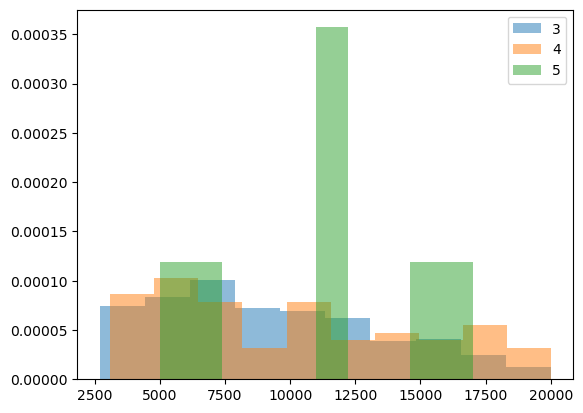

In [24]:
# making a histogram of rental price by number of bedrooms (range : 3 to 5)
plt.hist(df.rent[df.bedrooms==3], label = "3", density = True, alpha=0.5)
plt.hist(df.rent[df.bedrooms==4], label = "4", density = True, alpha=0.5)
plt.hist(df.rent[df.bedrooms==5], label = "5", density = True, alpha=0.5)
plt.legend()
plt.show()

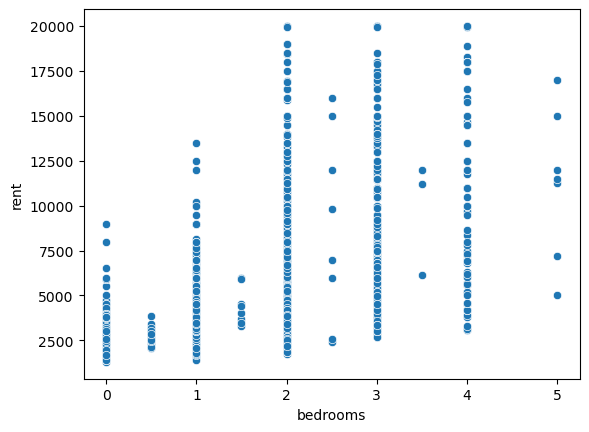

In [28]:
# scatterplot relationship between rental price and its number of bedrooms
sns.scatterplot(data = df, x = "bedrooms", y="rent")
plt.show()

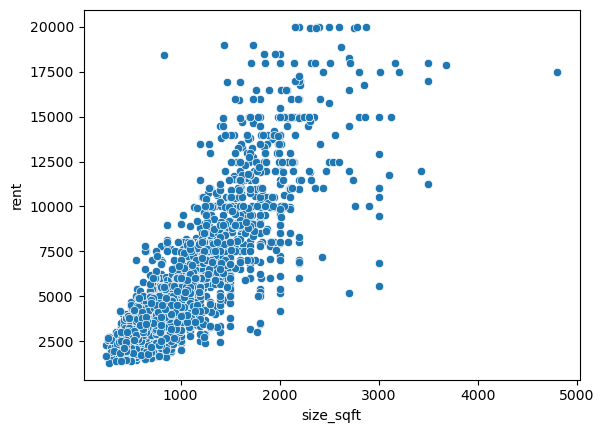

In [29]:
# scatterplot relationship between sqft and rental price
sns.scatterplot(data=df, x = "size_sqft", y="rent")
plt.show()

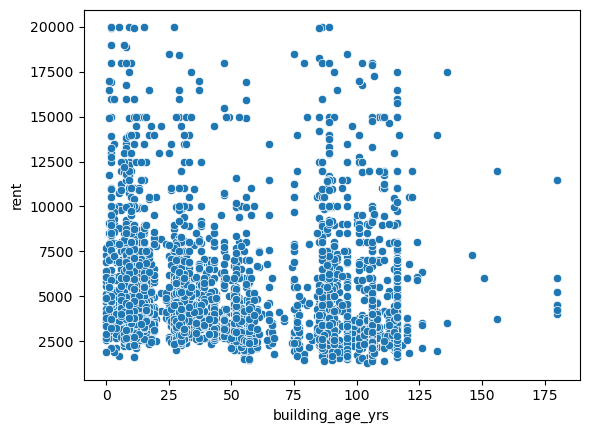

In [32]:
sns.scatterplot(data=df, x='building_age_yrs', y='rent')
plt.show()

/var/folders/lt/7_t8f37x0_1fmgc8jk4jh5qr0000gn/T/ipykernel_26505/4072822458.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['no','yes'])


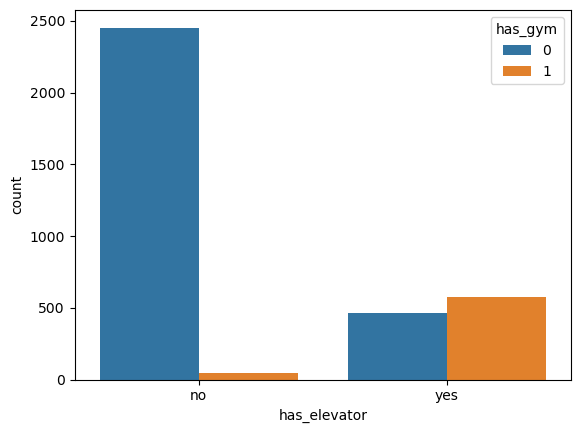

In [44]:
# relationship between having an elevator and having a gym
ax=sns.countplot(x='has_elevator', hue='has_gym', data=df)
ax.set_xticklabels(['no','yes'])
plt.show()

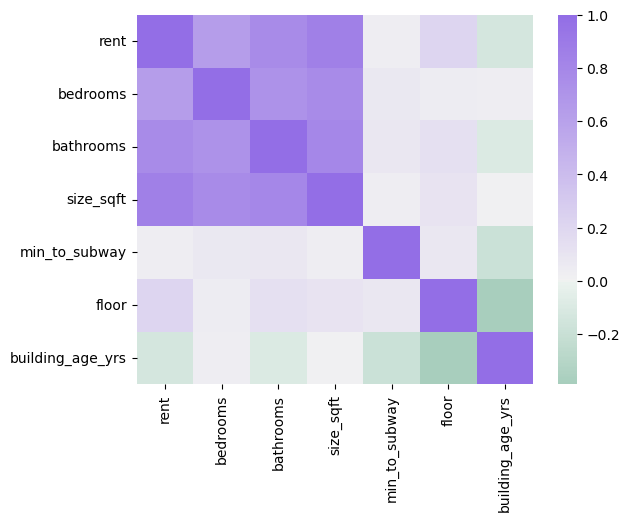

In [51]:
colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
heatmap_cols = df[['rent', 'bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs']]
sns.heatmap(heatmap_cols.corr(), center=0, cmap=colors, robust=True)
plt.show()